<a href="https://colab.research.google.com/github/sonny2801/AI_CNN_LOPCHIEUT2/blob/main/Nhandienkhuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import Flatten, MaxPooling2D
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
batch_size = 1
img_size = (150, 150)
img_path = '/content/drive/MyDrive/Nhandienkhuonmat/SonTrain'

In [4]:
image_generator = ImageDataGenerator(
    rescale = 1./255,
    brightness_range = (0.8, 1.2),
    zoom_range= (0.9, 1.2),
    validation_split= 0.2)

train_dataset= image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'training')
validation_dataset = image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,  
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'validation')

Found 50 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [5]:
train_dataset.classes
print(train_dataset.class_indices)

{'Nguoikhac': 0, 'Son': 1}


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                        

In [7]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='binary_crossentropy', metrics = ['accuracy'])

In [8]:
history = model.fit(train_dataset,batch_size=65,epochs=20,validation_data=validation_dataset)

Epoch 1/20
50/50 [==============================] - 35s 473ms/step - loss: 0.3832 - accuracy: 0.8200 - val_loss: 0.7027 - val_accuracy: 0.5000
Epoch 2/20
50/50 [==============================] - 4s 86ms/step - loss: 0.0957 - accuracy: 0.9400 - val_loss: 0.6775 - val_accuracy: 0.5000
Epoch 3/20
50/50 [==============================] - 4s 86ms/step - loss: 0.0777 - accuracy: 0.9600 - val_loss: 0.5196 - val_accuracy: 0.6667
Epoch 4/20
50/50 [==============================] - 4s 84ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.7800 - val_accuracy: 0.6667
Epoch 5/20
50/50 [==============================] - 4s 85ms/step - loss: 5.8533e-04 - accuracy: 1.0000 - val_loss: 0.4774 - val_accuracy: 0.7500
Epoch 6/20
50/50 [==============================] - 4s 86ms/step - loss: 1.9851e-04 - accuracy: 1.0000 - val_loss: 0.4658 - val_accuracy: 0.7500
Epoch 7/20
50/50 [==============================] - 4s 85ms/step - loss: 9.0901e-04 - accuracy: 1.0000 - val_loss: 0.7979 - val_accuracy: 0.5833

In [9]:
validation_dataset.labels

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

nguoi khac 


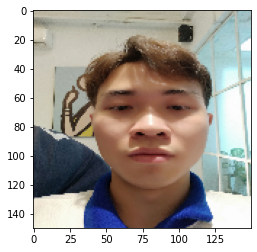

In [10]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/Nhandienkhuonmat/Nhandien/z3426191399398_835e897924c33e0b7f9aac72a32ffce2.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print("nguoi khac ")
if(test==1):
    print("Son")

Son


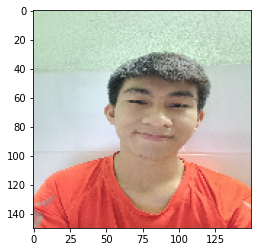

In [11]:
filename = "/content/drive/MyDrive/Nhandienkhuonmat/Nhandien/s5.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print("nguoi khac ")
if(test==1):
    print("Son")

Son


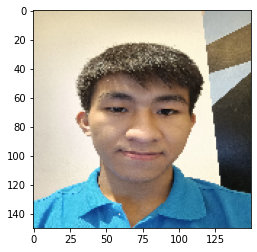

In [12]:
filename = "/content/drive/MyDrive/Nhandienkhuonmat/Nhandien/s1.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print("nguoi khac ")
if(test==1):
    print("Son")

nguoi khac 


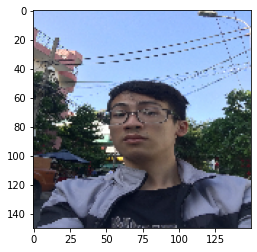

In [13]:
filename = "/content/drive/MyDrive/Nhandienkhuonmat/Nhandien/z3410471597503_a4cedbe91c2e3aae92382b0989bf8cb4.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==0):
    print("nguoi khac ")
if(test==1):
    print("Son")